# Comparison of synthetic and real data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dap import DAPcython
from dap.utils import obs_params_gbar, load_current, syn_current
from dap.dap_sumstats import DAPSummaryStats
from dap.dap_sumstats_moments import DAPSummaryStatsMoments

np.set_printoptions(formatter={'float': '{: 0.2f}'.format})

## load real data

In [2]:
data_dir = '/home/alteska/Desktop/LFI_DAP/data/rawData/2015_08_26b.dat'    # best cell
# data_dir = '/home/alteska/Desktop/LFI_DAP/data/rawData/2015_08_11d.dat'  # second best cell

# load the data
i_inj, v, time, t_on, t_off, dt = load_current(data_dir, protocol='rampIV', ramp_amp=3.1)
params, labels = obs_params_gbar()

In [3]:
t_on

10.0

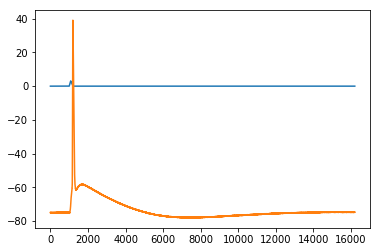

In [4]:
plt.plot(i_inj);
plt.plot(v);

In [5]:
v[10000]
time[10000]

100.0

## generate syntetic data

In [6]:
params, labels = obs_params_gbar(reduced_model=True)

In [7]:
dap = DAPcython(-75, params)
U = dap.simulate(dt, time, i_inj, noise=True, noise_fact=1e-2)
u = U.reshape(-1)

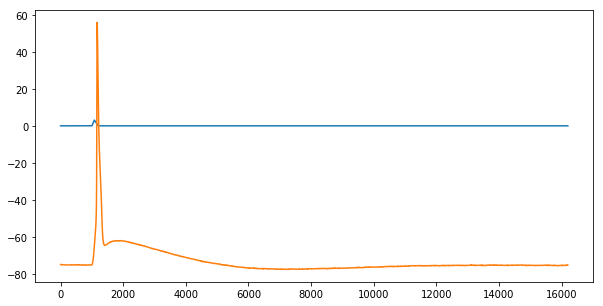

In [8]:
plt.figure(figsize=(10,5))
plt.plot(i_inj);
plt.plot(u);

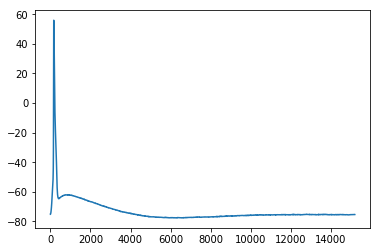

In [9]:
x = {'data': U}
v_dap = np.copy(np.array(x['data']))
v_x = v_dap[np.array(time > t_on)]
plt.plot(v_x);

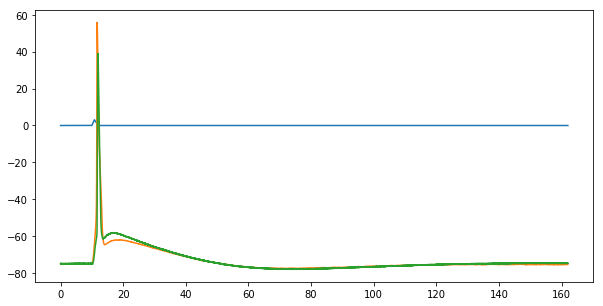

In [10]:
plt.figure(figsize=(10,5))
plt.plot(time, i_inj);
plt.plot(time, u);
plt.plot(time, v);

### Sumstats 

In [11]:
sum_stats_mom = DAPSummaryStatsMoments(t_on, t_off, n_summary=17)

In [12]:
# generate data format for summary statistcs
x_o = {'data': v.reshape(-1),
       'time': time,
       'dt': time[1]-time[0],
       'I': i_inj[0]}

x_1 = {'data': U.reshape(-1),
       'time': time,
       'dt': time[1]-time[0],
       'I': i_inj[0]}

In [13]:
sum_stats_mom.calc([x_o])

array([[-74.93,  0.05, -73.19,  1.00,  0.51,  0.42,  0.44,  0.43,
         1311.76,  1.03,  2.65,  4.78,  40.61,  1.03,  2.59,  4.66]])

In [14]:
sum_stats_mom.calc([x_1])

array([[-75.18,  0.02, -73.28,  1.00,  0.55,  0.30,  0.28,  0.29,
         1538.67,  0.76,  2.47,  3.88,  30.73,  1.18,  3.97,  13.74]])

In [15]:
rest_pot1 = np.mean(x['data'][time<t_on])

# find relevant lenght of the trace (for now from t_on till the end)
v_dap1 = np.array(x_1['data'])
v_dap1 = v_dap1[(time>t_on)]

# TODO: optionally cut the tail as well but might not work with
# bad trace: use v2 instead of dap for further calcualtions
# ind1 = np.where(v_dap1 > rest_pot1)
# v21 = v_dap1[:ind1[0][-1]]

In [16]:
rest_pot = np.mean(x['data'][time<t_on])

# find relevant lenght of the trace (for now from t_on till the end)
v_dap = np.array(x_o['data'])
v_dap = v_dap[(time>t_on)]

# TODO: optionally cut the tail as well but might not work with
# bad trace: use v2 instead of dap for further calcualtions
# ind = np.where(v_dap > rest_pot)
# v2 = v_dap[ind[0][0]:ind[0][-1]]
# ind1 = np.where(v_dap1 > rest_pot1)
# v21 = v_dap1[:ind[0][-1]]

### Different approach: just time

In [17]:
v_dap1 = np.array(x_1['data'])
vA1 = v_dap1[(time >= t_on) & (time <= t_off+1)]
vB1 = v_dap1[(time > t_off+1) & (time < 100)]
_v_dap1 = v_dap1[(time > t_on)]

v_dap = np.array(x_o['data'])
vA = v_dap[(time >= t_on) & (time <= t_off+1)]
vB = v_dap[(time >= t_off+1) & (time < 100)]
_v_dap = v_dap[(time > t_on)]


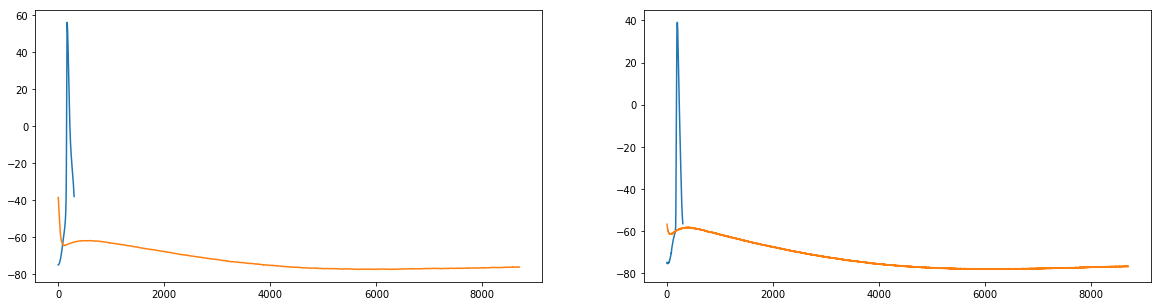

In [18]:
# plt.plot(x['data']);
fig, ax = plt.subplots(1,2,figsize=(20,5))
# ax[0].plot(_v_dap1)
ax[0].plot(vA1);
ax[0].plot(vB1);
# ax[1].plot(_v_dap)
ax[1].plot(vA);
ax[1].plot(vB);
# ax[1].plot(np.gradient(v2))

### Fully Synthetic Data

In [19]:
dt = 0.01
params, labels = obs_params_gbar(reduced_model=True)
params = params*10
I, time, t_on, t_off = syn_current(duration=120, dt=0.01)
t_on

55

In [20]:
dap = DAPcython(-75, params)
U = dap.simulate(dt, time, I, noise=True, noise_fact=1e-4)
u = U.reshape(-1)

In [21]:
x_2 = {'data': U.reshape(-1),
       'time': time,
       'dt': time[1]-time[0],
       'I': I}

In [22]:
c = sum_stats_mom.calc([x_2])
c

array([[-3.90,  0.01, -8.25,  3056.00,  0.65,  0.14, -0.13, -0.09,  0.00,
        -0.16,  1.81, -0.66,  0.03,  5.35,  33.80,  214.54]])

In [23]:
v_dap2 = np.array(x_2['data'])
vA2 = v_dap2[(time >= t_on) & (time <= t_off+1)]
vB2 = v_dap2[(time >= t_off+1) & (time < 100)]
_v_dap2 = v_dap2[(time > t_on)]


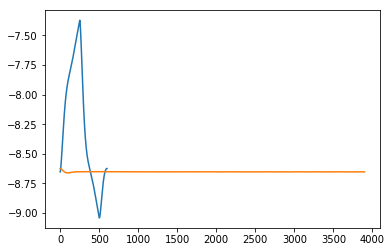

In [24]:
plt.plot(vA2)
plt.plot(vB2)